# similar to ridge_and _lasso.ipynb but for decision tree

In [29]:
# Import necessary libraries and files

import sys
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# our own files

import utilities.misc as misc
import utilities.metrics as mtr
import utilities.ml_functions as ml
from sklearn.model_selection import train_test_split


In [30]:

df = pd.read_csv('clean_weather/valid_data/m2_valid.csv')
X1 = df.iloc[:, 5] # wind speed
X2 = df.iloc[:, 3] # atmospheric pressure
X = np.column_stack((X1, X2))
Y = df.iloc[:, 7] # wave height

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


In [32]:
m2_loc = 'clean_weather/valid_data/m2_valid.csv'
Xm2, Ym2 = misc.make_3d_dataframe(data_loc=m2_loc, col_x1=5, col_x2=3, col_y=7)

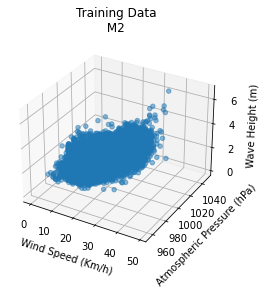

In [33]:
misc.plot_training_data(input_features=Xm2, target_feature=Ym2, dataset_id='M2', x_label='Wind Speed (Km/h)', y_label='Atmospheric Pressure (hPa)', z_label='Wave Height (m)')


In [34]:
# generate test data
# max_poly = 1 # any higher order of data makes training take a long time. Training data is large
# test_data = misc.genarate_test_values(x_upper=60, x_lower=0, y_upper=940, y_lower=1060, poly_level = max_poly)
# plt.scatter(test_data[:,1],test_data[:,2])
x_upper=60
x_lower=0
y_upper=940
y_lower=1060

test_data = []
x_grid = np.linspace(x_lower,x_upper, num = 20)
y_grid = np.linspace(y_lower,y_upper, num = 20)
for i in x_grid:
    for j in y_grid:
        test_data.append([i,j])
test_data = np.array(test_data)
np.shape(test_data)


(400, 2)

In [35]:

model = ml.train_dt_regressor(X_train, Y_train)


In [36]:
preds = model.predict(X_test)
preds_train =  model.predict(X_train)


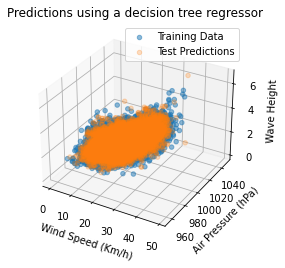

In [37]:
    
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train[:,0], X_train[:,1],Y_train, alpha=0.5, label='Training Data')
ax.scatter(X_test[:,0], X_test[:,1],Y_test, alpha=0.25, label='Test Predictions')
plt.title(f'Predictions using a decision tree regressor')
ax.set_xlabel('Wind Speed (Km/h)')
ax.set_ylabel( 'Air Pressure (hPa)')
ax.set_zlabel('Wave Height')
ax.legend()

In [38]:
test_mse = mtr.calculate_mse(preds,Y_test)
train_mse = mtr.calculate_mse(preds_train, Y_train)

In [39]:
print(f"test mse = {test_mse}\ntrain mse = {train_mse}")

test mse = 0.22100129819964456
train mse = 0.05977160743640893
